# Monte Carlo simulaatio Python-ohjelmointikielen avulla

Ennustamiseen ja ennakointiin käytetään usein mitä jalostetuimpia malleja. Usein taustalla on kuitenkin Excel-laskelmat, jotka pohjutuvat historiallisten lähtötietojen keskiarvoihin, intuitioon tai alakohtaiseen oivallukseen.

<a href="https://en.wikipedia.org/wiki/Monte_Carlo_method">Monte Carlo simulointi</a> on näppärä tapa ymmärtää ja havainnollistaa mahdollisia lopputuloksia. Sillä tavoin voidaan myös välttää heikkoudet, jotka aihetuvat pelkkien keskiarvojen tarkastelusta (ks. esim. artikkeli <a href="https://hbr.org/2002/11/the-flaw-of-averages">"law of averages"</a>). Tässä artikkelissa käytetään Python-ohjelmointikieltä ja sen pandas ja numpy-kirjastoja, joilla rakennetaan Monte Carlo simulointi myyntikorvausbudjetin mahdollisten arvojen tarkasteluun. Näkökulma on tarkoituksellisesti varsin yksinkertainen, jotta sitä olisi mahdollista muokata moniin muihinkin tapauksiin.

## Ongelma

Tässä esimerkissä selvitetään, kuinka paljon tulisi budjetoida seuraavan vuoden myyntikorvauksiin. Tähän ongelmaan on käytettävissä viime vuosien historiatieja aiemmin maksetuista korvauksista ja korvausten määrään on varsin yksinkertainen matemaattinen kaava.

Ongelma on myös merkityksellinen yrituksen kannalta. Myyntikorvaukset voivat olla iso kuluerä ja on tärkeää tietää niiden suuruusluokka budjettia tehtäessä. Monte Carlo simulointi on lisäksi varsin yksinkertaisesti toteutettava parannus tällaiseen varsin tavalliseen arviointimenetelmään.

Tässä esimerkissä myyntikorvaukset voisivat näyttää vaikkapa seuraavalta yrityksen talousjohtajan Excel-tiedostossa.

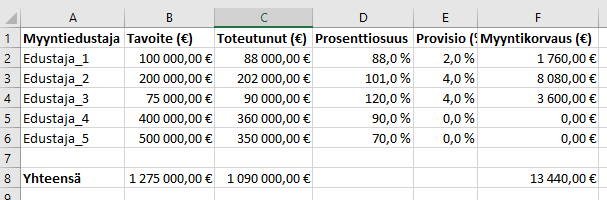

Tässä esimerkissä myyntikorvausten määrä lasketaan kaavalla

$$\textrm{Toteutunut (€)} * \textrm{Provisio (%)} = \textrm{Myyntikorvaus (€)}$$

Jatkossa myyntiprovision suuruus prosentteina perustuu seuraavaan suunnitelmaan myyntiedustajan tavoitteeseen yltämisestä.

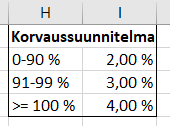

Ennen mallin rakentamista ja simulaation ajamista tutustutaan ensin vertailun vuoksi eräääseen yksinkertaisempaan lähestymistapaan, joka voisi hyvinkin tulla mieleen myyntikorvauksien suuruutta ennustettaessa ja niiden maksamiseen varauduttaessa.

## Yksinkertainen lähestymistapa

Ajatellaanpa, että talousosasto on lähestynyt analysointiosastoa ja antanut tehtäväksi arvioida seuraavan vuoden myyntikorvauksien suuruuden. Yksi lähestysmistapa voisi olla, että ottaa varman päälle ja olettaa, että jokainen myyntiedustaja saavuttaa tavoitteensa. Sen mukaiset luvut näyttäisivät talousjohtajan Excel-tiedostossa seuraavalta:

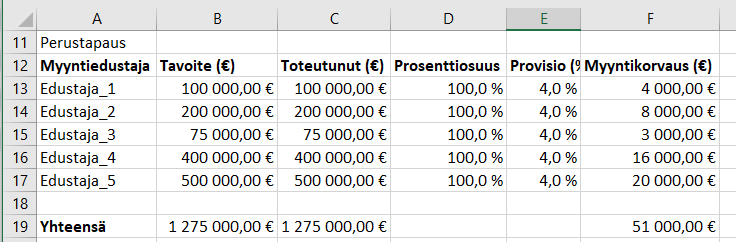

Talousjohtajan kommentit tähän voisivat olla, ettei koskaan ole ollut tilannetta, jossa kaikilla on ollut sama myyntiprovisio ja kaikki olisivat päässeet tavoitteeseensa. Tarvitsisimme tarkemman mallin budjettia varten.

Seuraavaksi analysointiosastolla voitaisiin yrittää muokata arvoja vaikkapa seuraavasti:

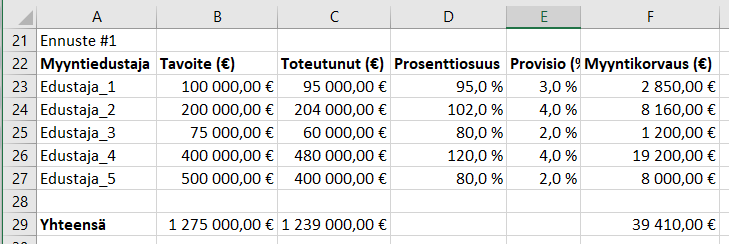

Tai vaikkapa seuraavasti:

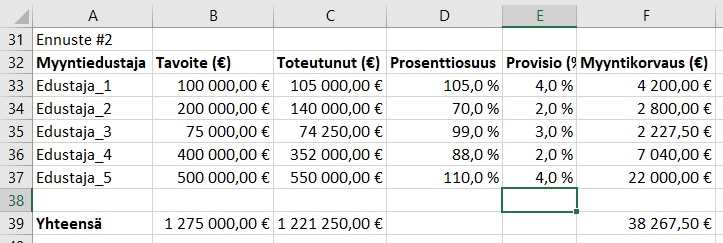

Näistä onkin jo vähän enemmän apua talousosastolle. Siellä kuitenkin halutaan luultavasti tietää, kuinka varmoja näistä arvioista myyntikorvauksien suuruudeksi voidaan olla. 

Jos ja kun hyvä arvio ja malli on sitten löydetty, seuraavaksi talousosasto halunnee sitä sovellettavan yhä useammalle edustajalle viiden sijaan, esim. kaikille yirtyksen 500 edustajan joukolle. Joilla jokaisella saattaa eri yksiköissä olla vielä erilainen proviosio-ohjeistus.

Tämä yksinkertaisen lähestymistavan esimerkki kuvaa Monte Carlo simuloinnin iteroivaa lähestymistapaa. Menetelmässä iteroidaan tapahtumasarjan kuluessa eri arvoja pyrkimyksenä saada vaihteluväli myyntikorvausten vaihteluvälin mahdollisille arvoille. Käsin tehden tällainen simulointi on varsin työlästä. Esim. ohjelmointikieliä hyödyntämällä simulointi on paljon helpompi tehdä. Tässä esimerkissä edetään Python ohjelmointikieltä hyödyntäen.

## Monte Carlo -simulointi

Edellä jo tutustuttiin ongelmaan ylätasolla. Nyt voidaankin peryhtyä siihen, millä tavoin juuri Monte Carlo -analyysi auttaa ennustamaan seuraavan vuoden myyntikorvausten suuruuden. Yksinkertaisimmillaan Monte Carlo -analyysi (simulaatio) sisältää useiden ennusteiden läpikäymistä erilaisilla syötteillä ja lopulta ajojen tulosten jakauma yhdistetään.

Myyntikorvauksia analysoitaessa jatketaan edellä aloitettua käsin muokattua menetelmää, mutta nyt ohjelma ajetaankin sata tai tuhat kertaa, jotta saadaan selville mahdollisten myyntikorvausten jakauma. Tämä jakauma kuvaa todennäköisyyttä, että kustannukset ovat tietyn suuruisia. Kyseessä on kuitenkin loppujen lopuksi ennusteesta eikä ole mielekästä olettaa, että arvio on täsmälleen toteutuvan suuruinen. Tällä tavoin saadaan kuitenkin tietoon perustuva käsitys mahdollisista yli- ja alibudjetointiin liittyvistä riskeistä.

Monte Carlo -simuloinnissa on kaksi osatekijää:

    - yhtälö, jonka arvoa lasketaan
    - syötteenä annettavat satunnaismuuttujat.

Tässä esimerkissä käytettävä yhtälö on selitetty jo artikkelin alussa. Nyt onkin vielä tuumittava, millaisia nuo satunnaismuuttujat voisivat tässä yhteydessä olla.

Yksinkertainen lähestymistapa satunnaismuuttujien arvoille voisi olla ottaa satunnainen prosenttiluku väliltä 0 % ja 200 %. Tämä perustuu intuitioon siitä, millaisia prosenttilukuja provisiot voisivat olla. Myyntikorvauksia on kuitenkin maksettu jo useiden vuosien ajan ja paremmpi käsitys ja malli saadaankin, jos käytetään aiempien vuosien muuttujien toteutunutta jakaumaa apuna.

Korvauksia on siis maksettu jo useiden vuosien ajan. joten olisi järkevää hyödyntää jakaumaa, joka kertoo toteutuneiden myyntilukujen prosenttiosuuden asetetusta tavoitteesta. Kuvio voisi näyttää vaikka seuraavalta:

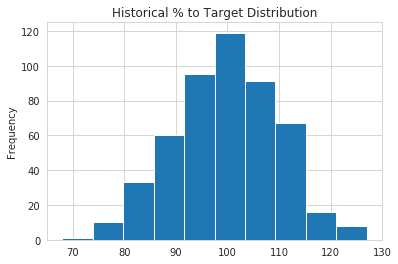

Tämä jakauma näyttää normaalijakautuneelta, jonka keskiarvo on 100 % ja keskihajonta 10 %. Tätä näkemysta taas on syytä hyödyntää syötemuuttujan jakauman arvioinnissa, jotta se vastaa mahdollisimman hyvin todellista tilannetta.

## Rakennetaan malli Pythonilla

Seuraavaksi muodostetaan malli Pythonin pandas-kirjastoa hyödyntöen. Malli toistaa edellä kuvaillut Excel-ohjelman laskelmat. Alla esitetyssä lähestymistavassa käytettyjä tietokehyksiä on helppo tarkastella ja niiden mielekkyyttä punnita. On myös muita ja tehokkaampia tapoja toteuttaa alla oleva malli.

Tehdään ensin perusvalmistelut ja tuodaan tarvittavat peruskirjastot.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

Mallia varten käytetään satunnaislukujen tuottamiseen *numpy*-kirjaston funktioita. Kätevää numpy-kirjastossa on, että se sisältää monta satunnaislukujen tuottamiseen tarvittavaa ohjelmaa, kun satunnaismuuttujan jakauma tiedetään ennalta. Ks. lisätietoja: https://docs.scipy.org/doc/numpy/reference/routines.random.html.

Edellä jo todettiinkin, että aiempina vuosina tavoitteeseen päässeiden osuus myyntikorvauksissa oli keskittynyt keskiarvon 100 % ympärille keskihajonnan ollessa 10 %. Määritellään seuraavaksi nuo luvut sekä myös edustajien lukumäärä ja ennusteiden toistojen lukumäärä.

In [2]:
keskiarvo = 1
keskihajonta= .1
edustajien_lkm = 500
simulaatioiden_lkm = 1000

Kirjaston numpy funktioita käyttäen saadaan nyt lista prosenttiluvuista, joka kuvaa aiempina vuosina toteutuneiden lukujen normaalijakaumaa. 

In [3]:
prosenttiosuus = np.random.normal(keskiarvo, keskihajonta, edustajien_lkm).round(2)

In [4]:
prosenttiosuus[0:9]

array([1.06, 0.84, 1.06, 1.08, 0.91, 0.89, 1.09, 0.95, 1.09])

Tarkoitus on parantaa yksinkertaista lähestymistapaa, joten jatkossa käytetään nimenomaan aiempiin toteutuneisiin myyntiosuuksiin perustuvaa normaalijakaumaa.Käyttäen numpy-kirjastoa muitakin jakaumia voi tarkastelussa käyttää. Tällaiseen tilanteeseen ryhtyessä on kuitenkin syytä olla huolellinen, että ymmärtää, mitä on tekemässä ja soveltuuko käytetty jakauma tilanteeseen.

Tässä tapauksessa on simuloitava myös toisen muuttujan arvoja ja tuo muuttuja on toteutunutta myyntiä kuvaava muuttuja. Tässä esimerkissä oletetaan, että tuon muuttujan jakauma on seuraavan kaltainen. Tämä osin myös siksi, jotta päästään tarkastelemaan, miten tällainen tapaus käsitellään tämäntyyppisessä analyysissä.

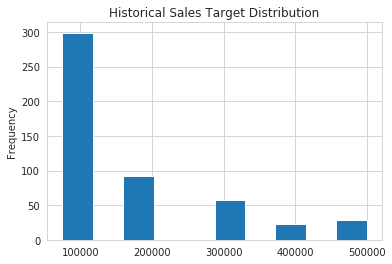

Kuvan mukaisen muuttujan jakauma on jotain muuta kuin normaalijakuma. Jakauma näyttää, että myyntitavoitteet on jaettu viiteen osaan ja kunkin osan esiintymistiheys pienenee euromäärän kasvaessa. Jakauma viittaakin hyvin yksinkertaiseen tavoitteenasetteluun, jossa edustajat jaetaan tiettyihin ryhmiin ja tavoiteasettelu perustuvat edustajien kokemusvuosiin, myyntialueen kokoon tai myyntikanaviin. 

Seuraavassa laskennassa yksinkertaistetaan tätä tilannetta niin, että pohjana käytetään tasaista jakaumaa mutta sitä korjataan asettamalla tietyille arvoille pienemmät todennäköisyydet.

Tämä tehdään käyttämällä numpyn funktiota *numpy.random.choice*.

In [5]:
myyntitavoitteiden_arvot = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
myyntitavoitteiden_todennakoisyydet = [.3, .3, .2, .1, .05, .05]
myyntitavoitteet= np.random.choice(myyntitavoitteiden_arvot, edustajien_lkm, p=myyntitavoitteiden_todennakoisyydet)

Esimerkki saattaa toki näyttää vähän yksioikoiselta, mutta tarkoitus on ennen kaikkea näyttää miten erilaisia jakaumia voidaan tässä mallissa käsitellä.

Nyt tiedetään, millä tavoin tehdään kaksi erilaista jakaumaa syötteenä. Seuraavaksi tehdään niistä pandaksen tietokehys.

In [6]:
df = pd.DataFrame(index=range(edustajien_lkm), data={'Osuus tavoitteesta': prosenttiosuus,
                                               'Myyntitavoite (€)': myyntitavoitteet})

df['Toteutunut (€)'] = df['Osuus tavoitteesta'] * df['Myyntitavoite (€)']

df.head()

,Osuus tavoitteesta,Myyntitavoite (€),Toteutunut (€)
0,1.06,100000,106000.0
1,0.84,200000,168000.0
2,1.06,100000,106000.0
3,1.08,200000,216000.0
4,0.91,75000,68250.0


Edellä toteutuneet myyntimäärät laskettiin kaavalla. Tämänkaltaisessa esimerkissä toteutuneet myyntitavoitteiden euromäärät voivat poiketa huomattavastikin toisistaan eri vuosina mutta tavoitteiden prosenttiosuuksien jakauma pysyy yleensä varsin samankaltaisena. Tästä syystä edellä käytettiin satunnaisia prosentttiosuuksia (osuus tavoitteesta), joista sitten laskettiin toteutuneet myyntimäärät euroina.

Tarkistetaan vielä visuaalisesti, että myyntiosuuksien jakauma näyttää järkevältä.

<Axes: title={'center': 'Aiemmin toteutuneiden myyntiosuuksien jakauma'}, ylabel='Frequency'>

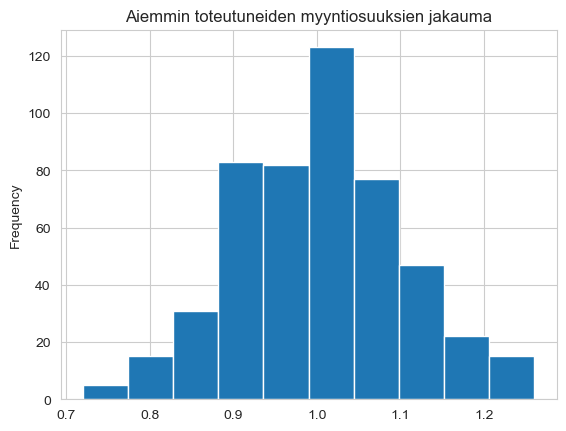

In [7]:
df['Osuus tavoitteesta'].plot(kind='hist', title='Aiemmin toteutuneiden myyntiosuuksien jakauma')

Tehdään sama myyntitavoitteille.

<Axes: title={'center': 'Aiemmin toteutuneiden myyntitavoitteiden jakauma'}, ylabel='Frequency'>

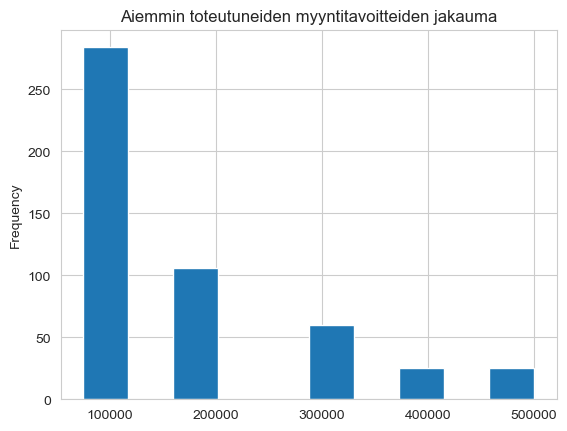

In [8]:
df['Myyntitavoite (€)'].plot(kind='hist', title='Aiemmin toteutuneiden myyntitavoitteiden jakauma')

Nyt on vielä yhdistettävä järkevällä tavalla edustajan saavuttama prosenttiosuus tavoitteesta ja yrityksen maksama provisio. Se tehdään seuraavalla funktiolla.

In [9]:
def laske_provisio(x):
    """ Provision maksaminen perustuu seuraavaan taulukkoon:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

Lasketaan seuraavaksi provisiot ja niiden mukaiset euromääräiset myyntikorvaukset.

In [10]:
df['Provisio'] = df['Osuus tavoitteesta'].apply(laske_provisio)
df['Myyntikorvaus (€)'] = df['Provisio'] * df['Toteutunut (€)']

df.head()

,Osuus tavoitteesta,Myyntitavoite (€),Toteutunut (€),Provisio,Myyntikorvaus (€)
0,1.06,100000,106000.0,0.04,4240.0
1,0.84,200000,168000.0,0.02,3360.0
2,1.06,100000,106000.0,0.04,4240.0
3,1.08,200000,216000.0,0.04,8640.0
4,0.91,75000,68250.0,0.03,2047.5


Siinäpä se. Tässä on siis toistettu Excel-esimerkin kaltainen malli Pythonia ja siinä olevia todennäköisyyysjakaumia hyödyntäen.

Edellä olevassa taulussa on näyetty vain viisi ensimmäistä riviä. Jos huomioidaan kaikki 500 edustajaa ja lasketaan arvot yhteen, saadaan seuraavia arvoja talousosastole toimitettavaksi.

In [11]:
print(f'Edustajien myyntitavoitteet yhteensä {df["Myyntitavoite (€)"].sum()} €')
print(f'Edustajien toteutuneet myynnit yhteensä {df["Toteutunut (€)"].sum()} €')
print(f'Edustajien myyntikorvaukset yhteensä {df["Myyntikorvaus (€)"].sum()} €')

Edustajien myyntitavoitteet yhteensä 86750000 €
Edustajien toteutuneet myynnit yhteensä 87051000.0 €
Edustajien myyntikorvaukset yhteensä 2994277.5 €


Katsotaan vielä kaikkia mallin muuttujien tunnuslukuja.

In [12]:
df.describe().round(2)

,Osuus tavoitteesta,Myyntitavoite (€),Toteutunut (€),Provisio,Myyntikorvaus (€)
count,500.00,500.00,500.00,500.00,500.00
mean,1.00,173500.00,174102.00,0.03,5988.56
std,0.10,119221.13,120582.55,0.01,4574.50
min,0.72,75000.00,57000.00,0.02,1140.00
25%,0.93,75000.00,83625.00,0.03,2910.00
50%,1.00,100000.00,107000.00,0.04,4220.00
75%,1.06,200000.00,222000.00,0.04,8480.00
max,1.26,500000.00,595000.00,0.04,23800.00


## Simulointi

Monte Carlo -simuloinnin varsinainen hienous on, että simulointi toistetaan useita kertoja ja lopulta aletaan saada mielikuva siitä, miltä lopputulos luultavimmin näyttää. Pythonilla nämä toistot voidaan tehdä for-silmukalla. Simuloinnin tekijä voi itse päättää toistojen määrän.

Sen lisäksi, että seuraavassa toistetaan simulointi useaan kertaan, kunkin kierroksen tulokset lisätään listaan tulosten jakauman analysoimiseksi.

In [13]:
# Määritetään lista, johon tallennetaan kaikkien simulaation tuloksia analysointia varten

kaikki_toistot = []

# Luodaan silmukka
for i in range(simulaatioiden_lkm):

    # Valitaan satunnaiset syötteet myyntitavoitteiksi ja tavoiteprosenteiksi
    myyntitavoitteet = np.random.choice(myyntitavoitteiden_arvot, edustajien_lkm, p=myyntitavoitteiden_todennakoisyydet)
    prosenttiosuus = np.random.normal(keskiarvo, keskihajonta, edustajien_lkm).round(2)

    # Tietokehys syötteille ja edustajille
    df = pd.DataFrame(index=range(edustajien_lkm), data={'Osuus tavoitteesta': prosenttiosuus,
                                                   'Myyntitavoite (€)': myyntitavoitteet})

    # Toteutuneet myyntimäärät toteutunutta prosenttiosuutta hyödyntäen
    df['Toteutunut (€)'] = df['Osuus tavoitteesta'] * df['Myyntitavoite (€)']

    # Määritetään ja lasketaan provisio
    df['Provisio'] = df['Osuus tavoitteesta'].apply(laske_provisio)
    df['Myyntikorvaus (€)'] = df['Provisio'] * df['Toteutunut (€)']

    # Lisätään toteutuneet myyntiluvut, myyntikorvaukset ja myyntitavoitteet kertyneistä simulaatioista
    kaikki_toistot.append([df['Myyntitavoite (€)'].sum().round(2),
                      df['Toteutunut (€)'].sum().round(2),
                      df['Myyntikorvaus (€)'].sum().round(2)])

Yllä olevassa silmukassa on seitsemän Python-lauseketta. Silmukka voidaan toistaa vaikka kuinka monta kertaa halutaan. Jossain vaiheessa toistojen määrä menettää merkityksensä eikä tuloksissa ole enää isoja eroja. Esim. miljoonan toiston etu kymmeneen tuhanteen voi olla varsin pieni. Varsinainen lukumäärä riippuu tietysti käsiteltävästä esimerkistä. Kannattaa kokeilla erilaisia tistojen lukumääriä ja vertailla lopputuloksia.

Analysoidaan vielä simulaatioiden tuloksia. Luodaan sitä varten tehdystä listasta oma tietokehys.

In [14]:
tulokset_df = pd.DataFrame.from_records(kaikki_toistot, columns=['Myyntitavoite (€)',
                                                                 'Toteutunut (€)',
                                                           'Myyntikorvaus (€)'])

Laskelmien tulokset voidaankin tiivistää nyt niiden tunnuslukuihin.

In [15]:
tulokset_df.describe().style.format('{:.2f}', decimal=',')

,Myyntitavoite (€),Toteutunut (€),Myyntikorvaus (€)
count,"1000,00","1000,00","1000,00"
mean,"83757375,00","83768164,50","2861383,50"
std,"2771214,47","2805255,58","104830,15"
min,"75075000,00","74804750,00","2511277,50"
25%,"81943750,00","81952312,50","2793593,12"
50%,"83725000,00","83727125,00","2858072,50"
75%,"85600000,00","85605875,00","2928725,00"
max,"93100000,00","93215250,00","3206857,50"


Histogrammina simulaatioiden jakauma näyttää seuraavalta.

<Axes: title={'center': 'Myyntikorvaukset yhteensä (Miljoonaa €)'}, ylabel='Frequency'>

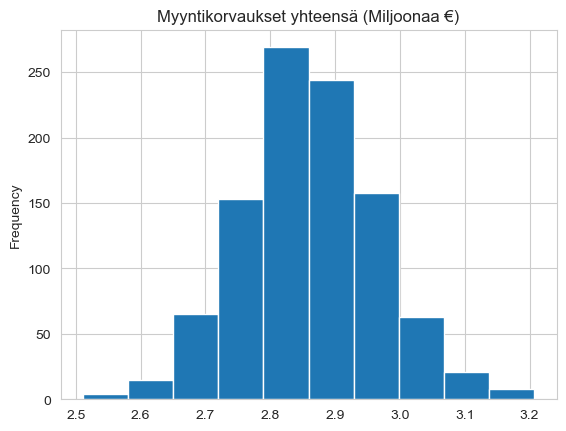

In [16]:
(tulokset_df['Myyntikorvaus (€)']/1000000).plot(kind='hist', title="Myyntikorvaukset yhteensä (Miljoonaa €)")

Mitä kuvio ja tunnusluvut sitten kertovat? Ensinnäkin nähdääm, että keskimääräinen myyntikorvaus on 2,86 miljoonaa euroa ja keskihajonta on 105 tuhatta euroa. Pienimmillään myyntikorvaukset ovat olleet 2,5 miljoonaa ja suurimmillaan reilut 3,2 miljoonaa euroa.

Näihin tuloksiin nojautuen, kuinka järkevänä olisi budjetoida seuraavan vuoden myyntikorvauksiin 3 miljoona euroa? Tai entäpä jos talousosasto ilmoittaakin, että kulut eivät saa ylittää 2,7 miljoonaa?

Monte Carlo -simuloinnin hyöty onkin, että sen avulla voidaan helposti tarkastella mahdollisten lopputulosten jakaumaa. Tämä yhdistettynä alan osaamiseen ja tulevien suhdanteiden arvioon antaa hyvän pohjan oppineen arvauksen tekemiseen.

Tällaisen mallin käyttämisen hyöty on siinä, että sen avulla voidaan helposti tarkastella erilaisia tilanteesen vaikuttavia tekijöitä. Tässä kyseisessä esimerkissä voitaisiin vaikka tarkastella seuraavien tekijöiden vaikutusta lopputulokseen:

* Muuta provisioiden prosenttilukuja.
* Muuta edustajien lukumäärää.
* Muuta odotetujen arvojen keskihajontaa.
* Muuta tavoitteiden jakaumaa.

Kun malli on kerran tehty, siinä olevien muuttujien arvoja voidaan helposti muuttaa ja ajaa koodi uudestaan.

Monta carlo -simuloinnin hyöty on myös siinä, että sen lopputulos on suhteellisen helppo selittää loppukäyttäjälle. Se ei vaadi pitkälle menevää matemaattista tietämystä vaan simulaation tulos on helppo ymmärtää intuitiivisesti ja sen avulla on helppo arvioida erilaisten lopputulosten mahdollisuutta.

## Yhteenveto

Monte Carlo -simuloinnin avulla voidaan suhteellisen helposti ennakoida laskennan mahdollisten tulevien arvojen lopputulosten jakaumaa käyttäen useita erilaisia mahdollisia satunnaisia syötteitä. Pyhon-ohjelmointikielen pandas- ja numpy-kirjastot auttavat rakentamaan mallin, jonka pohjalta on mielekästä todennäköisyysjakaumia hyödyntäen laskea mahdolliset lopputulokset erilaisille syötteille. Näiden lopputulosten analysointi on sitten helppoa ja havainnollista. Tämä lähestymistapa mahdollistaa myös useiden erilaisten ennusteiden laskemisen ja mallia on myös helppo muokata muihin esimerkkeihin soveltuvaksi. Tulokset on helppo julkistaa ja selittää myös ilman alan erityistietämystä.

Source and original article:<br /> 
<a href="https://pbpython.com/monte-carlo.html">Chris Moffitt: Monte Carlo Simulation with Python</a>


In [17]:
import datetime
print(f'Last modified {datetime.datetime.now():%Y-%m-%d %H:%M} by Juha Nurmonen')

Last modified 2023-11-27 02:33 by Juha Nurmonen
